#ECSE415-Assignment4


##Import Necessary Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import math
import time

##Part 1: Image Segmentation using K-means


In [ ]:
#Lets define a function to create the cluster centers
def kmeansClusters(image, k):
  #Get x size and y size
  x_max = image.shape[0]
  y_max = image.shape[1]
  clusterCenters = []

  #Based on the value of K create K clusters and return the array
  for i in range(k):
    x_val = randint(0, x_max-1)
    y_val = randint(0, y_max-1)
    clusterCenters.append((x_val, y_val))

  return clusterCenters

#Simple function to return distance
def distance(r, g, b, r_cluster, g_cluster, b_cluster):
  return math.sqrt((r - r_cluster)**2 + (g - g_cluster)**2 + (b - b_cluster)**2)


def clustering(image, clusterCenters):
  x_size = image.shape[0]
  y_size = image.shape[1]

  labels = np.full((x_size, y_size), -1)

  numClusters = len(clusterCenters)

  #Run for 10 iterations
  for i in range(10):
    #Assign to clusters
    for j in range(x_size):
      for k in range(y_size):
        r, g, b = image[j][k]
        cluster_distances = []

        for l in range(numClusters):
          r_cluster, g_cluster, b_cluster = image[clusterCenters[l][0]][clusterCenters[l][1]]
          difference = distance(int(r), int(g), int(b), int(r_cluster), int(g_cluster), int(b_cluster))
          cluster_distances.append(difference)
        
        labels[j][k] = np.argmin(cluster_distances)

    #Reassign cluster centers
    for j in range(numClusters):
      x_mean, y_mean = clusterCenters[j]
      temp_x = 0
      temp_y = 0
      count = 0

      for k in range(x_size):
        for l in range(y_size):
          if labels[k][l] == j:
            count += 1
            temp_x += k
            temp_y += l

      #Verify that the cluster has some labels, otherwise dont touch
      #the cluster means
      if count != 0:
        temp_x //= count
        temp_y //= count
        clusterCenters[j] = (temp_x, temp_y)

  r_vals = []
  g_vals = []
  b_vals = []

  for x, y in clusterCenters:
    r_vals.append(image[x][y][0])
    g_vals.append(image[x][y][1])
    b_vals.append(image[x][y][2])

  return labels, r_vals, g_vals, b_vals

def imageCreator(cluster_labels, numClusters, r_vals, g_vals, b_vals):
  x_size = cluster_labels.shape[0]
  y_size = cluster_labels.shape[1]

  new_image = np.zeros((x_size, y_size, 3))

  for k in range(numClusters):
    for i in range(x_size):
      for j in range(y_size):
        if cluster_labels[i][j] == k:
          new_image[i][j][0] = int(r_vals[k])
          new_image[i][j][1] = int(g_vals[k])
          new_image[i][j][2] = int(b_vals[k])

  return new_image

Home Shape :(384, 512, 3)
Flower Shape: (450, 600, 3)

Initial home image clusters are [(165, 469), (93, 511)]
Initial flower image clusters are [(106, 440), (328, 571)]

Elapsed time is: 68.70828938484192s.


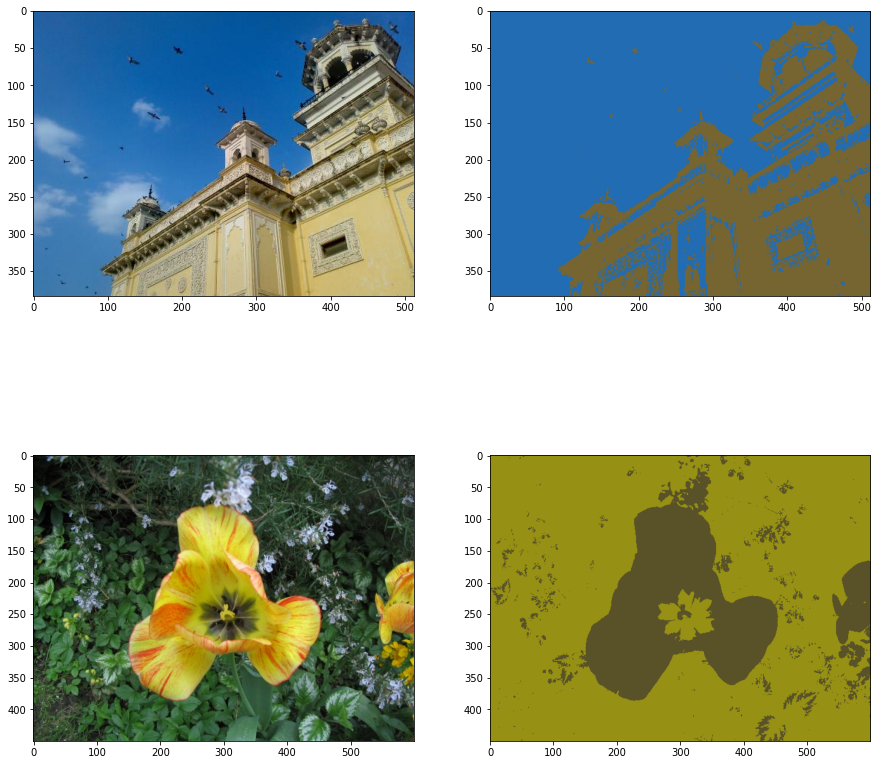

In [ ]:
#Record time
start_time = time.time()

#Import the two images
home = cv2.imread("home.jpg")
flower = cv2.imread("flower.jpg")

#Convert from BGR to RGB due to use of cv2 for importing
home = cv2.cvtColor(home, cv2.COLOR_BGR2RGB)
flower = cv2.cvtColor(flower, cv2.COLOR_BGR2RGB)

#Define our hyperparameter K
k = 2

print("Home Shape :"+str(home.shape))
print("Flower Shape: "+str(flower.shape))
print()

#Lets create the cluster centers given some value of K
homeCluster = kmeansClusters(home, k)
flowerCluster = kmeansClusters(flower, k)

print("Initial home image clusters are "+ str(homeCluster))
print("Initial flower image clusters are "+ str(flowerCluster))
print()

home_labels, r_valsHome, g_valsHome, b_valsHome = clustering(home, homeCluster)
flower_labels, r_valsFlower, g_valsFlower, b_valsFlower = clustering(flower, flowerCluster)

new_home = imageCreator(home_labels, k, r_valsHome, g_valsHome, b_valsHome)
new_flower = imageCreator(flower_labels, k, r_valsFlower, g_valsFlower, b_valsFlower)

end_time = time.time()

print("Elapsed time is: "+str((end_time-start_time))+"s.")

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(home)

plt.subplot(2,2,2)
plt.imshow(new_home.astype(np.uint8))

plt.subplot(2,2,3)
plt.imshow(flower)

plt.subplot(2,2,4)
plt.imshow(new_flower.astype(np.uint8))
plt.show()

##Part 2: Disparity

0.00%% finished.
0.26%% finished.
0.52%% finished.
0.78%% finished.
1.04%% finished.
1.30%% finished.
1.56%% finished.
1.82%% finished.
2.08%% finished.
2.34%% finished.
2.60%% finished.
2.86%% finished.
3.12%% finished.
3.38%% finished.
3.64%% finished.
3.90%% finished.
4.16%% finished.
4.42%% finished.
4.68%% finished.
4.94%% finished.
5.19%% finished.
5.45%% finished.
5.71%% finished.
5.97%% finished.
6.23%% finished.
6.49%% finished.
6.75%% finished.
7.01%% finished.
7.27%% finished.
7.53%% finished.
7.79%% finished.
8.05%% finished.
8.31%% finished.
8.57%% finished.
8.83%% finished.
9.09%% finished.
9.35%% finished.
9.61%% finished.
9.87%% finished.
10.13%% finished.
10.39%% finished.
10.65%% finished.
10.91%% finished.
11.17%% finished.
11.43%% finished.
11.69%% finished.
11.95%% finished.
12.21%% finished.
12.47%% finished.
12.73%% finished.
12.99%% finished.
13.25%% finished.
13.51%% finished.
13.77%% finished.
14.03%% finished.
14.29%% finished.
14.55%% finished.
14.81%% finis

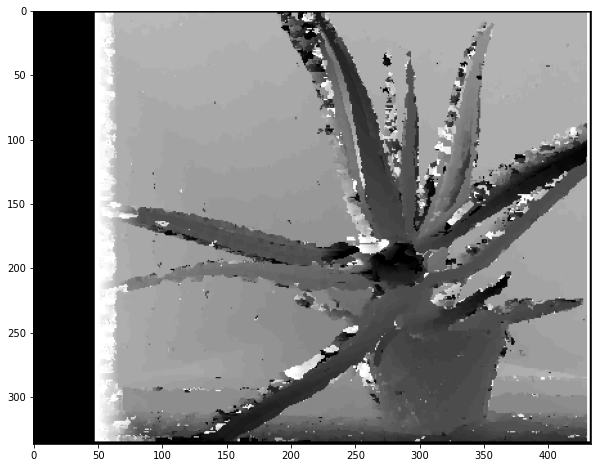

Elapsed time is: 316.82479596138s.


In [ ]:
def searchWindow(image, x_pos, y_pos):
  #Create the reference window and scan image sizes
  referenceWindow = np.zeros((5, 5))
  max_x = image.shape[1]
  max_y = image.shape[0]

  #Loop through 5x5 area, pixels out of bounds are assigned 0
  for i in range(-2,3):
    for j in range(-2,3):
      if (x_pos + i) < 0 or (x_pos + i) > max_x-1 or (y_pos + j) < 0 or (y_pos + j) > max_y -1:
        referenceWindow[j+2][i+2] = 100000
      else: 
        referenceWindow[j+2][i+2] = image[y_pos + j][x_pos + i]

  return referenceWindow

def sumSquareDifference(window1, window2):
  rows,cols = window1.shape
  sum = 0
  for i in range(cols):
    for j in range(rows):
      sum += (window1[j][i] - window2[j][i])**2
  
  return math.sqrt(sum)
  
#Record time
start_time = time.time()

#Load images
imgL = cv2.imread("aloeL.jpg")
imgR = cv2.imread("aloeR.jpg")

#Resize images
imgL = cv2.resize(imgL, None, fx = 0.3, fy = 0.3)
imgR = cv2.resize(imgR, None, fx = 0.3, fy = 0.3)

#Convert to grayscale
imgL_gray = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
imgR_gray = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)

rows, cols = imgL_gray.shape

#Create disparity map, set all values to 48, and start scanning pixels
disparity_Map = np.full((rows+4, cols+2+47), 48)
for i in range(cols):
  percent = float(i) / float(cols)
  print("{:.2%}".format(percent)+"% finished.")
  for j in range(rows):
    windowL = searchWindow(imgL_gray, i, j)
    
    weights = []
    for k in range(-47, 1):
      if i+k >= 0:
        windowR = searchWindow(imgR_gray, i+k, j)
        weights.append(sumSquareDifference(windowL, windowR))
      else:
        weights.append(100000)
    
    index = np.argmin(weights)
    disparity_Map[j + 2][i+48] = 48 - index

plt.figure(figsize=(10,10))
plt.imshow(disparity_Map.astype(np.uint8), cmap='gray_r')

plt.show()

end_time = time.time()
print("Elapsed time is: "+str((end_time-start_time))+"s.")

#Part 3: Optical Flow

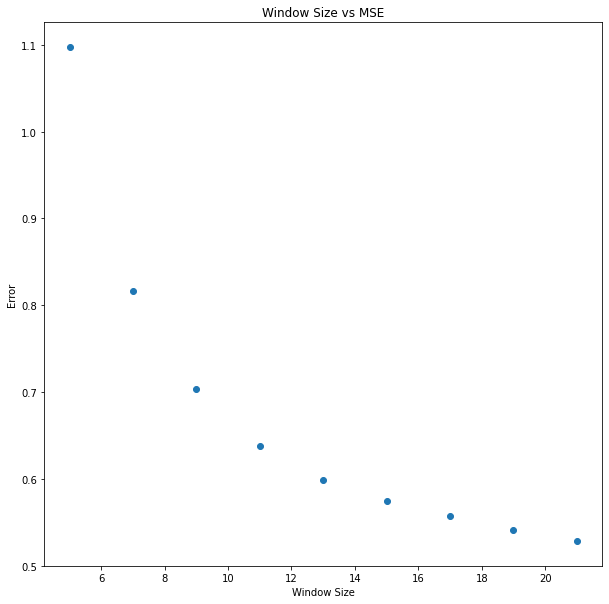

In [ ]:
#Import images and ground truth
groundTruth = np.load('flow10.npz')['flow']
frame10 = cv2.imread('frame10.png')
frame11 = cv2.imread('frame11.png')

frame10 = cv2.cvtColor(frame10, cv2.COLOR_BGR2GRAY)
frame11 = cv2.cvtColor(frame11, cv2.COLOR_BGR2GRAY)

meanSquareError = []
windowSize = []

for i in range(5,23,2):
  flow = cv2.calcOpticalFlowFarneback(prev= frame10,
                                      next = frame11,
                                      flow = None,
                                      pyr_scale = 0.5,
                                      levels = 3,
                                      winsize = i,
                                      iterations = 3,
                                      poly_n = 5,
                                      poly_sigma = 1.2,
                                      flags = 0)
  
  meanSquareError.append(((flow - groundTruth)**2).mean())
  windowSize.append(i)

#Plot the MSE
plt.figure(figsize=(10,10))
plt.scatter(windowSize, meanSquareError)
plt.xlabel("Window Size")
plt.ylabel("Error")
plt.title("Window Size vs MSE")
plt.show()

The general trend of the plot seems to indicate that as the window size increases, the mean square error decreases. So it is better to keep a larger window size in order to reduce the prediction error. 